# 1D Schrödinger PINN vs. Exact Solution Comparison

This notebook trains the 1D Schrödinger PINN and compares its predictions against the analytic infinite‐well eigenstate at a fixed time.

In [2]:
# Import necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from Schrodinger_PINN import SchrodingerPINN1D, plot_results, train

### Case 1: Schrödinger equation with potential equal to 0 and $n=1$.

In [2]:
# --- Build & Train ---
params = {
    'epochs': 3000,
    'eta' : 1e-3,
    'l2_lambda' : 1e-6,
    'fine_tuning%': 10
}

# Define the length of the domain
L = 1  

# Create the training data
x_i = torch.linspace(0, L, 1000).reshape(-1, 1)

# Create psi0 which is the initial condition
def psi0(x_i): 
    return np.sqrt(2/L) * torch.sin(np.pi * x_i / L)

# Define the number of layers and neurons
#layers = [2, 64, 64, 64, 2]
layers = [2, 72, 72, 72, 2]
# For this model we will use the SchrodingerPINN1D class
# The activation function is set to 'tanh' by default
# The initialization method is set to 'xavier' by default
model = SchrodingerPINN1D(layers)

In [3]:
# Train the model
losses, epochs = train(model, params, psi0)

Started with --> Adam epochs: 3000, LBFGS epochs: 300
Stage 1: Adam optimization
Epoch 500, Loss: 7.02e-01, PDE Loss: 2.26e-01, IC Loss: 1.32e-02, BC Loss: 3.44e-02
Epoch 1000, Loss: 2.25e-01, PDE Loss: 6.08e-02, IC Loss: 7.83e-04, BC Loss: 1.57e-02
Epoch 1500, Loss: 1.13e-01, PDE Loss: 3.90e-02, IC Loss: 6.33e-04, BC Loss: 6.77e-03
Epoch 2000, Loss: 4.39e-02, PDE Loss: 1.41e-02, IC Loss: 3.49e-04, BC Loss: 2.63e-03
Epoch 2500, Loss: 2.25e-02, PDE Loss: 8.24e-03, IC Loss: 2.21e-04, BC Loss: 1.20e-03
Epoch 3000, Loss: 1.22e-02, PDE Loss: 4.20e-03, IC Loss: 1.38e-04, BC Loss: 6.66e-04
Stage 1: Adam optimization finished. 

Stage 2: LBFGS optimization.
Final loss: 1.28e-02, PDE Loss: 4.20e-03, IC Loss: 1.38e-04, BC Loss: 6.66e-04


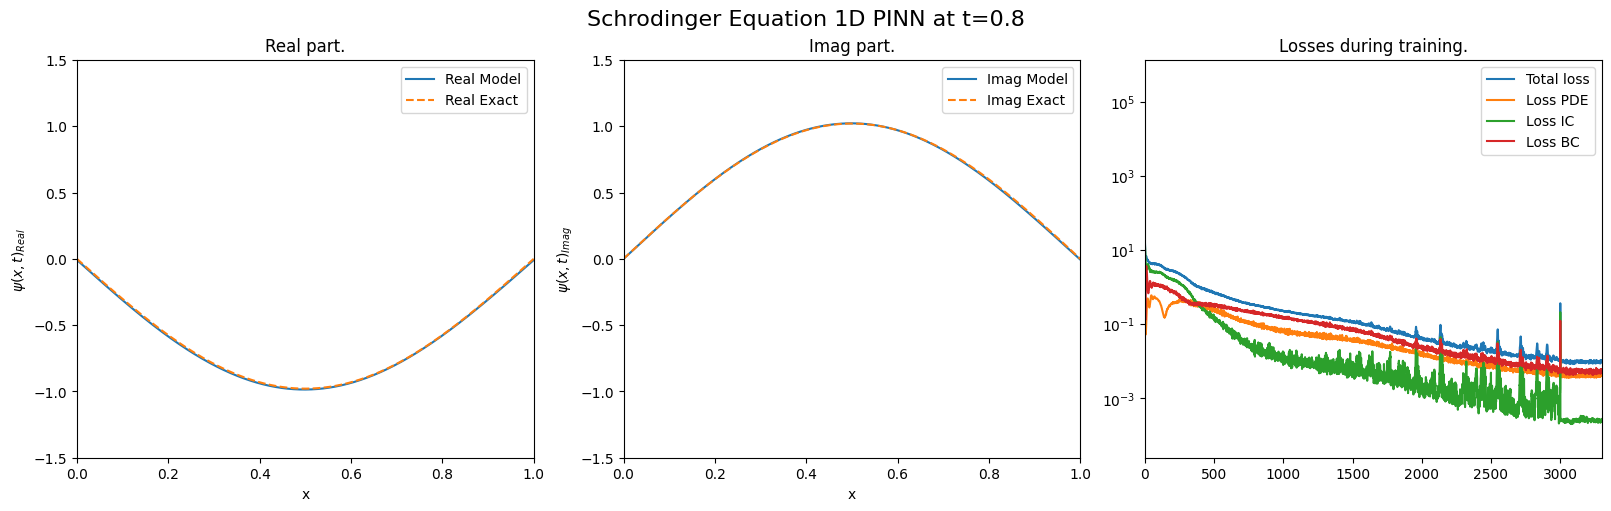

In [5]:
plot_results(0.8, x_i, model, losses, epochs)

# Case 2: Schrödinger equation with potential equal to 0 and $n=3$.

In [7]:
# --- Build & Train ---
params = {
    'epochs': 30000,
    'eta' : 1e-3,
    'l2_lambda' : 1e-6,
    'fine_tuning%': 4
}

# Define the length of the domain
L = 1  

# Create the training data
x_i = torch.linspace(0, L, 1000).reshape(-1, 1)

# Create psi0 which is the initial condition
def psi02(x_i): 
    return np.sqrt(2/L) * torch.sin(3*np.pi * x_i / L)

# Define the number of layers and neurons
#layers = [2, 64, 64, 64, 2]
layers = [2, 72, 72, 72, 2]

# For this model we will use the SchrodingerPINN1D class
# The activation function is set to 'tanh' by default
# The initialization method is set to 'xavier' by default
model2 = SchrodingerPINN1D(layers)

In [8]:
losses2, epoch2 = train(model2, params, psi02)

Started with --> Adam epochs: 30000, LBFGS epochs: 1200
Stage 1: Adam optimization
Epoch 500, Loss: 5.94e+00, PDE Loss: 7.59e-01, IC Loss: 4.81e-01, BC Loss: 3.68e-02
Epoch 1000, Loss: 2.14e+00, PDE Loss: 4.07e-01, IC Loss: 1.21e-01, BC Loss: 5.22e-02
Epoch 1500, Loss: 8.60e-01, PDE Loss: 1.78e-01, IC Loss: 2.94e-02, BC Loss: 3.89e-02
Epoch 2000, Loss: 6.82e-01, PDE Loss: 1.33e-01, IC Loss: 1.45e-02, BC Loss: 4.04e-02
Epoch 2500, Loss: 5.02e-01, PDE Loss: 7.81e-02, IC Loss: 9.85e-03, BC Loss: 3.25e-02
Epoch 3000, Loss: 4.09e-01, PDE Loss: 8.78e-02, IC Loss: 7.05e-03, BC Loss: 2.51e-02
Epoch 3500, Loss: 4.23e-01, PDE Loss: 6.13e-02, IC Loss: 5.90e-03, BC Loss: 3.03e-02
Epoch 4000, Loss: 3.87e-01, PDE Loss: 5.30e-02, IC Loss: 4.68e-03, BC Loss: 2.87e-02
Epoch 4500, Loss: 3.68e-01, PDE Loss: 5.00e-02, IC Loss: 3.53e-03, BC Loss: 2.83e-02
Epoch 5000, Loss: 3.92e-01, PDE Loss: 7.00e-02, IC Loss: 3.56e-03, BC Loss: 2.86e-02
Epoch 5500, Loss: 3.18e-01, PDE Loss: 4.38e-02, IC Loss: 2.52e-03, B

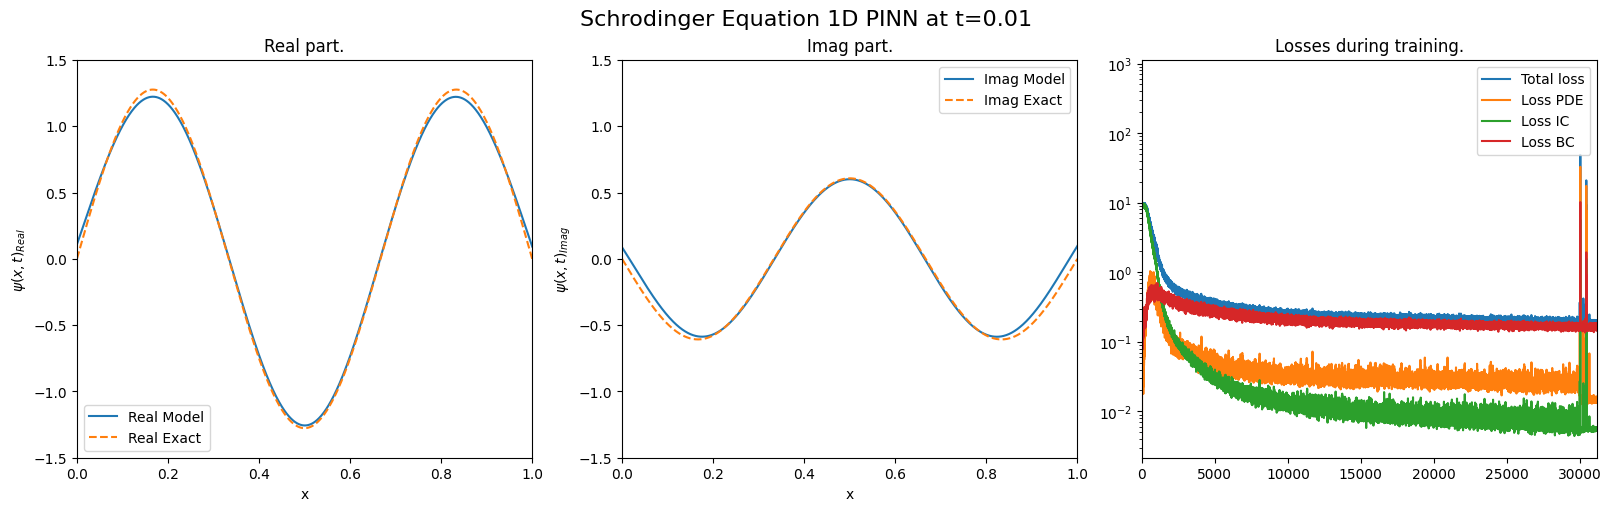

In [14]:
plot_results(0.01, x_i, model2, losses2, epoch2, nl=3)

# Case superposition $n = 1$ and $n = 3$

## $\psi_0 = A\psi_{n=1} + B\psi_{n=2}$

## $A^2+B^2 = \frac{2}{L}$



In [3]:
# --- Build & Train ---
params = {
    'epochs': 3000,
    'eta' : 1e-3,
    'l2_lambda' : 1e-6,
    'fine_tuning%': 4
}

# Define the length of the domain
L = 1  

# Create the training data
x_i = torch.linspace(0, L, 1000).reshape(-1, 1)

# Create psi0 which is the initial condition
def psi03(x_i):
    A = np.sqrt(7/4)
    B = np.sqrt(1/4)
    return A*torch.sin(np.pi*x_i) + B*torch.sin(3*np.pi*x_i)

# Create psi0 which is the initial condition
def psi03t(x_i, t_plot):

    A = np.sqrt(7/4)
    B = np.sqrt(1/4)
    return A*torch.sin(np.pi*x_i)*np.exp((-1j*np.pi**2*t_plot)/2) + B*torch.sin(3*np.pi*x_i)*np.exp((-9j*np.pi**2*t_plot)/2)

# Define the number of layers and neurons
#layers = [2, 64, 64, 64, 2]
layers = [2, 72, 72, 72, 2]

# For this model we will use the SchrodingerPINN1D class
# The activation function is set to 'tanh' by default
# The initialization method is set to 'xavier' by default
model3 = SchrodingerPINN1D(layers)

In [4]:
losses3, epoch3 = train(model3, params, psi03)

Started with --> Adam epochs: 3000, LBFGS epochs: 120
Stage 1: Adam optimization
Epoch 500, Loss: 1.57e+00, PDE Loss: 2.46e-01, IC Loss: 8.66e-02, BC Loss: 4.61e-02
Epoch 1000, Loss: 1.12e+00, PDE Loss: 1.27e-01, IC Loss: 7.36e-02, BC Loss: 2.60e-02
Epoch 1500, Loss: 8.51e-01, PDE Loss: 1.21e-01, IC Loss: 5.61e-02, BC Loss: 1.69e-02
Epoch 2000, Loss: 7.43e-01, PDE Loss: 1.14e-01, IC Loss: 4.79e-02, BC Loss: 1.50e-02
Epoch 2500, Loss: 6.21e-01, PDE Loss: 9.77e-02, IC Loss: 4.25e-02, BC Loss: 9.84e-03
Epoch 3000, Loss: 5.14e-01, PDE Loss: 7.64e-02, IC Loss: 3.70e-02, BC Loss: 6.79e-03
Stage 1: Adam optimization finished. 

Stage 2: LBFGS optimization.
Final loss: 5.20e-01, PDE Loss: 7.64e-02, IC Loss: 3.70e-02, BC Loss: 6.79e-03


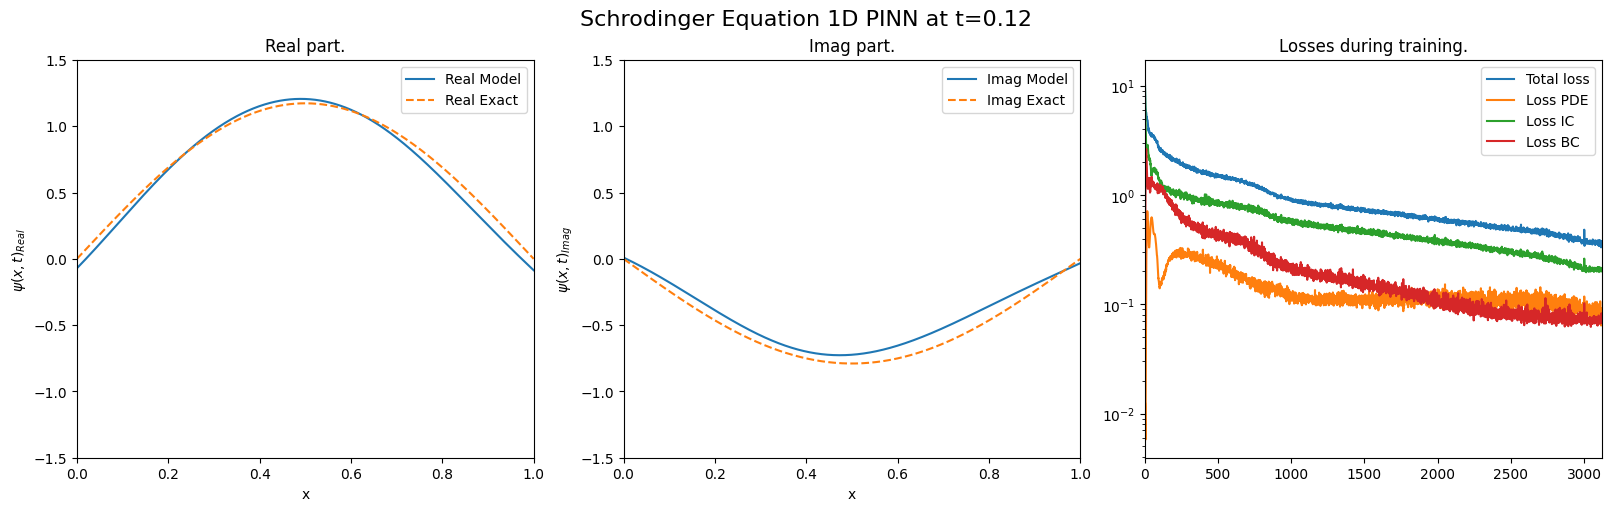

In [50]:
plot_results(0.12, x_i, model3, losses3, epoch3, exact_sol=psi03t)